Contexto:
Con la creciente demanda y la competencia feroz en el mercado, un Superstore Giant está buscando su conocimiento para comprender qué funciona mejor para ellos. 

* La base de datos contiene el histórico de ventas de 1457 días.
* Fecha de última orden recibida: 2017-12-30.

Hallazgos generales:

* El 59.9% de los productos vendidos son enviados por Standard Class.
* El 52.3% de los productos vendidos son de venta directa al consumidor.
* California es el estado que tiene una mayor cantidad de productos vendidos con 21% del total, seguido por New York y Texas, con 11.2% y 9.9% respectivamente.
* 68.3% de los productos vendidos pertenecen a la categoría de materiales de oficina, seguido por muebles y por último, tecnología.

Comportamiento de compra según descuento:
* La probabilidad de que un producto vendido tenga un descuento es de 51.68%.
* La probabilidad de que un cliente haga una orden superior al ticket promedio dado que compro un producto que tiene descuento es 57.82%.
* En general, los productos que tienen descuento generan una utilidad baja, llegando a ser incluso negativa.

Tiempos de envío:
* Existe una asociación estadísticamente significativa entre la categoría del producto y la región del cliente, quiere decir que se puede generar una estrategía logisica en la que se dispongan los productos según categoría en una bodega cercana a la región donde normalmente los compran y así reducir tiempos de envío.
* Los tiempos promedio de envío son similares en todas las regiones, siendo el promedio 4 días.
* El máximo tiempo de envío es de 7 días.

Utilidad y ventas:
* Los productos de la categoría de tecnología tienden a generar una utilidad más alta.
* La demanda de los productos de la SuperStore es estacional en el último trimestre del año.
* El ticket promedio de las órdenes con por lo menos un producto con descuento es 50.02% mayor que las ordenes sin ningún producto con descuento.
* La utilidad promedio por orden es -43.44% menor en las órdenes que tienen por lo menos un producto con descuento.
* El costo por unidad promedio de cada producto se ha mantenido a través de los años, en un promedio de $33.44.
* La cantidad de órdenes de cada categoría ha aumentado ligeramente durante el tiempo. La categoría de materiales de oficina ha tenido un crecimiento significativo en la cantidad de órdenes de 60% en los últimos 4 años.
* El ticket y utilidad promedio no presentan estacionalidad, por lo que el aumento en ventas del último trimestre del año que se ve impusaldo gracias a descuentos, no esta representando mayores utilidades.
* El ticket promedio mensual por orden está en un rango de $69.49 - $138.04.
* La utilidad promedio mensual por orden está en un rango de $11.89 - $22.05.

Correlación entre variables:
* Existe una correlación positiva baja entre las variables sales y profit. El hecho de que la correlación sea baja indica que un ticket promedio más alto no siempre significa una mayor utilidad.
* Existe una correlación negativa baja entre las variables discount y profit, que indica que en algunos casos un mayor descuento no significa una menor utilidad, así que existe la posibilidad de enfocar la estrategía de descuentos hacía productos que tienen mayores margenes y evitar perdidas al momento de ofrecer descuentos.

In [4]:
import pandas as pd
import numpy as np

from datetime import datetime as dt
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import math

import matplotlib.dates as mdates
from scipy.stats import chi2_contingency

sns.set()

# Cargue y limpieza de la base de datos

Importar base de datos y renombrar columnas.

In [5]:
df = pd.read_csv("superstore_dataset.csv", parse_dates = ["Order Date", "Ship Date"]).drop("Row ID", axis = 1)

nombre_col_nuevo = ["order_id", "order_date", "ship_date", "ship_mode", "customer_id", "customer_name", "segment", "country", "city", "state", "postal_code", "region", 
                    "product_id", "category", "sub_category", "product_name", "sales", "quantity", "discount", "profit"]

df.columns = nombre_col_nuevo

Remover columnas redudantes.

In [6]:
df.drop("country", axis = 1, inplace = True)

Validar existencia de duplicados y eliminarlos.

In [7]:
duplicados = df[df.duplicated(keep = False)]

print(f"Hay un total de {len(duplicados)} valores duplicados con el id:", duplicados["order_id"].unique())

df.drop_duplicates(inplace = True)

Hay un total de 2 valores duplicados con el id: ['US-2014-150119']


In [8]:
ordenes_distintas = df["order_id"].nunique()
print(f"La base de datos consiste de {ordenes_distintas} órdenes distintas. Hay códigos de orden ID repetidos, ya que una orden puede consistir de varios productos")

La base de datos consiste de 5009 órdenes distintas. Hay códigos de orden ID repetidos, ya que una orden puede consistir de varios productos


Validar existencia de datos nulos.

In [9]:
valores_nulos = df.isna().sum().sum()
print(f"Se identifican {valores_nulos} valores nulos")

Se identifican 0 valores nulos


Validar tipos de datos.

In [10]:
df.dtypes

order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

In [11]:
print("Los tipos de datos de las variables están correctamente asignados")

Los tipos de datos de las variables están correctamente asignados


Dimensiones de la base de datos.

In [12]:
print(f"Las dimensiones de la base de datos luego de la limpieza son {df.shape}")

print(f"La base de datos contiene el histórico de ventas de", (np.max(df["order_date"]) - np.min(df["order_date"])).days, "días")

Las dimensiones de la base de datos luego de la limpieza son (9993, 19)
La base de datos contiene el histórico de ventas de 1457 días


In [13]:
print("Fecha de última orden recibida:", np.max(df["order_date"]))

Fecha de última orden recibida: 2017-12-30 00:00:00


# Análisis descriptivo

Variables númericas.

In [14]:
df.describe(percentiles = [0.25, 0.50, 0.75, 0.90, 0.95]).T

,count,mean,std,min,25%,50%,75%,90%,95%,max
postal_code,9993.0,55191.576403,32065.074478,1040.000,23223.000,56560.000,90008.000,94122.00000,98006.00000,99301.000
sales,9993.0,229.852846,623.276074,0.444,17.280,54.480,209.940,572.72400,957.02988,22638.480
quantity,9993.0,3.789753,2.225149,1.000,2.000,3.000,5.000,7.00000,8.00000,14.000
discount,9993.0,0.156188,0.206457,0.000,0.000,0.200,0.200,0.40000,0.70000,0.800
profit,9993.0,28.660971,234.271476,-6599.978,1.731,8.671,29.364,89.29008,168.47040,8399.976


In [15]:
print("Se identifican valores atípicos que requieren mayor investigación, como una ganancia de", np.min(df["profit"]), "en una de las órdenes")

Se identifican valores atípicos que requieren mayor investigación, como una ganancia de -6599.978 en una de las órdenes


Remover valores atípicos.

In [16]:
#función para remover valores atípicos según columna y dataframe que se pase como parámetro

def remover_atipicos(columna, dataframe):
    iqr = stats.iqr(dataframe[columna])
    umbral_inferior = np.quantile(dataframe[columna], 0.25) - 1.5 * iqr
    umbral_superior = np.quantile(dataframe[columna], 0.75) + 1.5 * iqr

    dataframe_sin_atipicos = dataframe[(dataframe[columna] > umbral_inferior) & (dataframe[columna] < umbral_superior)]
    cantidad_valores_atipicos = len(dataframe[(dataframe[columna] < umbral_inferior) | (dataframe[columna] > umbral_superior)])
    print(f"Se removieron {cantidad_valores_atipicos} valores atípicos de la columna {columna}.")
    return dataframe_sin_atipicos

In [17]:
df = remover_atipicos(dataframe = df, columna = "sales")

Se removieron 1167 valores atípicos de la columna sales.


In [18]:
df = remover_atipicos(dataframe = df, columna = "profit")

Se removieron 1435 valores atípicos de la columna profit.


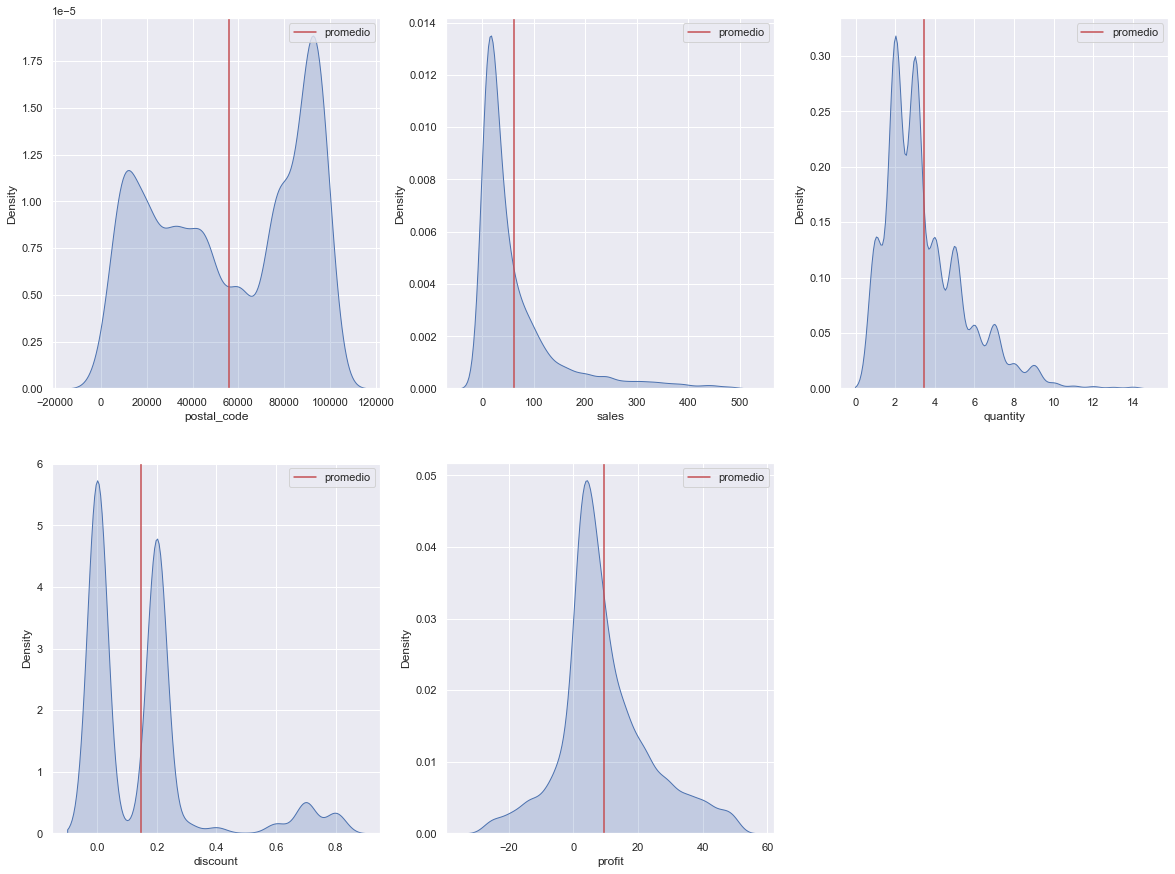

In [19]:
variables_numericas = df.dtypes[(df.dtypes == "int64") | (df.dtypes == "float64")].index

plt.figure(figsize = (20, 15))
for x in range(len(variables_numericas)):
    plt.subplot(2, 3, x + 1)
    sns.kdeplot(df[variables_numericas[x]], shade = True)
    plt.axvline(np.mean(df[variables_numericas[x]]), color = "r")
    plt.legend(["promedio"])
plt.show()

Variables categóricas.

In [20]:
df.describe(include = "O").T

,count,unique,top,freq
order_id,7391,4281,CA-2017-100111,10
ship_mode,7391,4,Standard Class,4429
customer_id,7391,789,CK-12205,28
customer_name,7391,789,Chloris Kastensmidt,28
segment,7391,3,Consumer,3869
city,7391,505,New York City,670
state,7391,48,California,1543
region,7391,4,West,2454
product_id,7391,1636,FUR-FU-10004270,16
category,7391,3,Office Supplies,5050


Análisis variables categóricas.

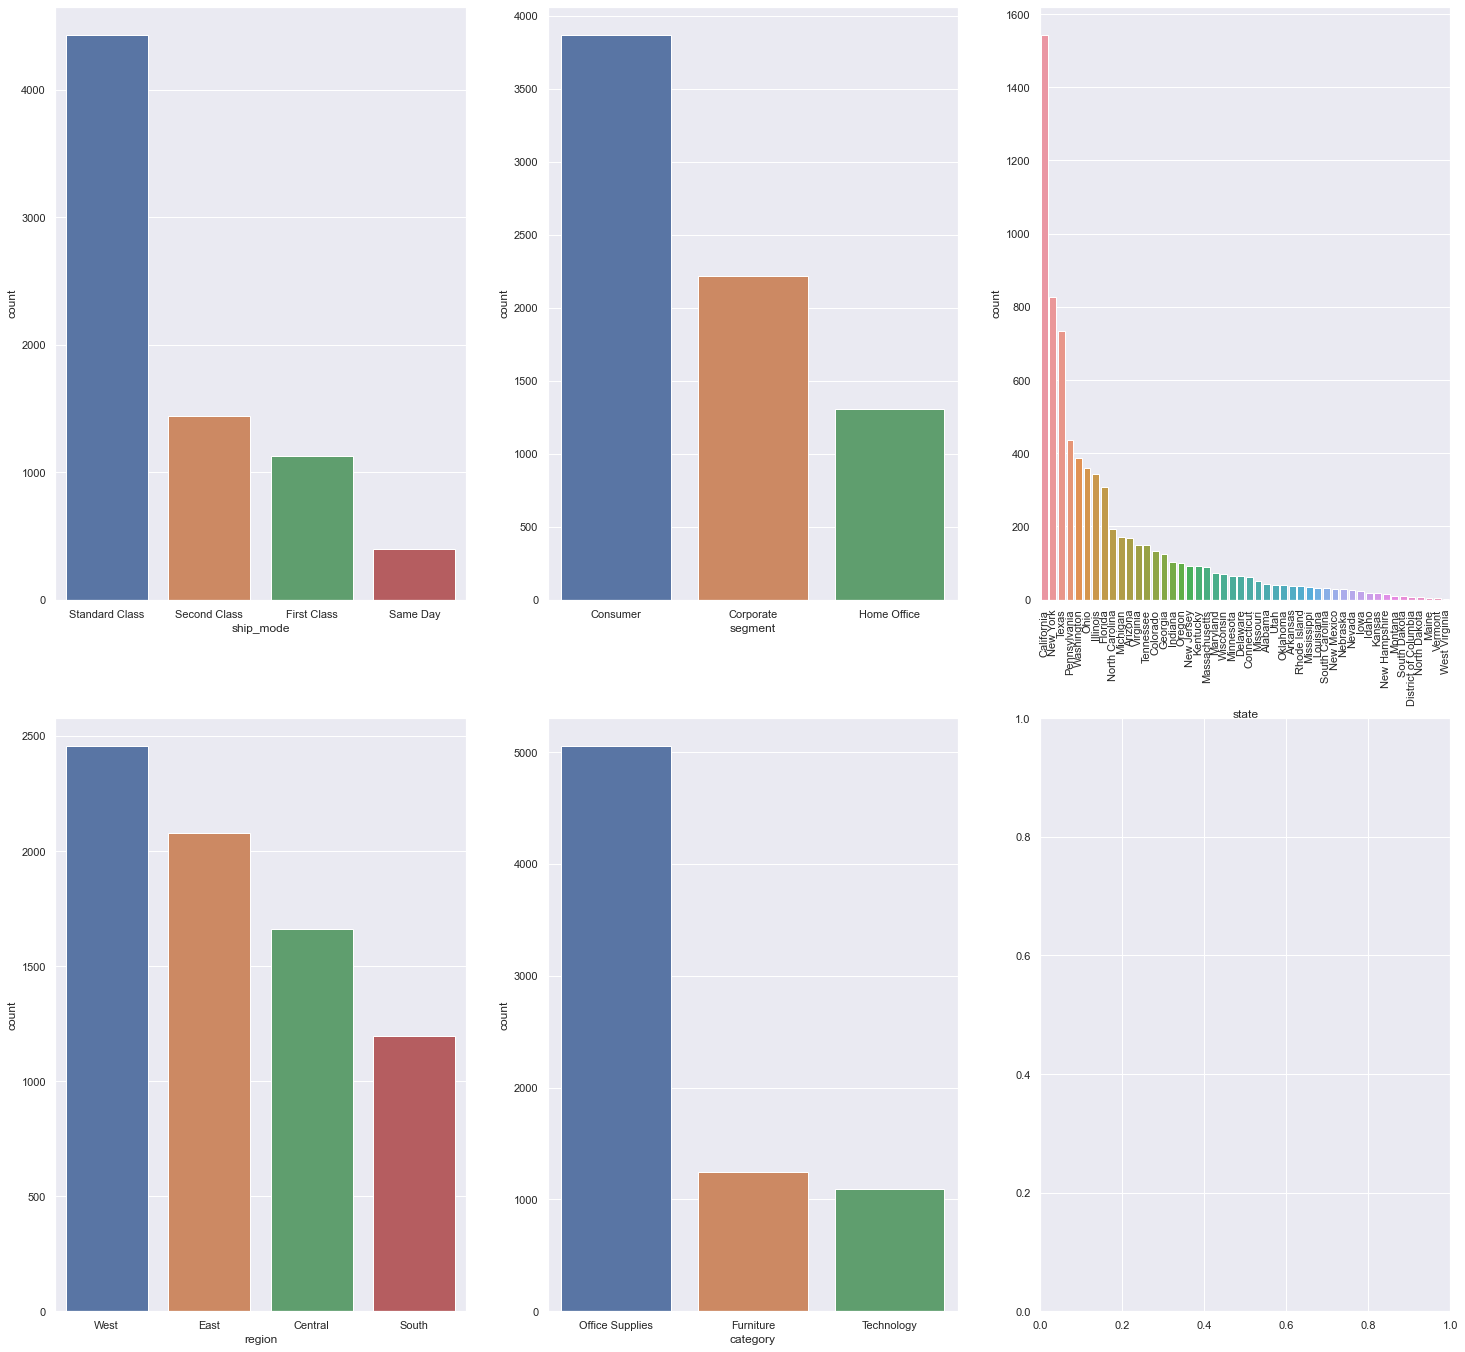

In [21]:
fig, ax = plt.subplots(2, 3, figsize = (25, 24))

sns.countplot(x = "ship_mode", data = df, order = df["ship_mode"].value_counts(ascending = False).index, ax = ax[0, 0])

sns.countplot(x = "segment", data = df, order = df["segment"].value_counts(ascending = False).index, ax = ax[0, 1])

sns.countplot(x = "region", data = df, order = df["region"].value_counts(ascending = False).index, ax = ax[1, 0])

sns.countplot(x = "category", data = df, order = df["category"].value_counts(ascending = False).index, ax = ax[1, 1])

a = sns.countplot(x = "state", data = df, order = df["state"].value_counts(ascending = False).index, ax = ax[0, 2])
a.set_xticklabels(rotation = 90, labels = df["state"].value_counts(ascending = False).index)

plt.show()

In [22]:
print(df["ship_mode"].value_counts(normalize = True, ascending = False))
print("")
print(df["segment"].value_counts(normalize = True, ascending = False))
print("")
print(df["state"].value_counts(normalize = True, ascending = False)[:3])
print("")
print(df["region"].value_counts(normalize = True, ascending = False))
print("")
print(df["category"].value_counts(normalize = True, ascending = False))

Standard Class    0.599242
Second Class      0.194426
First Class       0.152618
Same Day          0.053714
Name: ship_mode, dtype: float64

Consumer       0.523474
Corporate      0.300230
Home Office    0.176295
Name: segment, dtype: float64

California    0.208767
New York      0.111893
Texas         0.099445
Name: state, dtype: float64

West       0.332025
East       0.281017
Central    0.225003
South      0.161954
Name: region, dtype: float64

Office Supplies    0.683263
Furniture          0.168989
Technology         0.147747
Name: category, dtype: float64


In [23]:
print("El 59.9% de los productos vendidos son enviados por Standard Class")
print("El 52.3% de los productos vendidos son de venta directa al consumidor")
print("California es el estado que tiene una mayor cantidad de productos vendidos con 21% del total, seguido por New York y Texas, con 11.2% y 9.9% respectivamente")
print("68.3% de los productos vendidos pertenecen a la categoría de materiales de oficina, seguido por muebles y por último, tecnología")

El 59.9% de los productos vendidos son enviados por Standard Class
El 52.3% de los productos vendidos son de venta directa al consumidor
California es el estado que tiene una mayor cantidad de productos vendidos con 21% del total, seguido por New York y Texas, con 11.2% y 9.9% respectivamente
68.3% de los productos vendidos pertenecen a la categoría de materiales de oficina, seguido por muebles y por último, tecnología


In [24]:
print("La probabilidad de que un producto vendido tenga un descuento es de", len(df[df["discount"] > 0]) / len(df) * 100, "%")

La probabilidad de que un producto vendido tenga un descuento es de 51.68448112569342 %


In [25]:
ticket_promedio_general = np.mean(df["sales"])
probabilidad_orden_mayor_ticket_promedio = len(df[df["sales"] > ticket_promedio_general]) / len(df)
probabilidad_orden_con_descuento = len(df[df["discount"] > 0]) / len(df) 

print("La probabilidad de que un cliente haga una orden superior al ticket promedio dado que compro un producto que tiene descuento es", (probabilidad_orden_mayor_ticket_promedio / probabilidad_orden_con_descuento) * 100, "%")

La probabilidad de que un cliente haga una orden superior al ticket promedio dado que compro un producto que tiene descuento es 57.82722513089005 %


Análisis variables númericas.

In [26]:
df["is_discounted"] = df["discount"].apply(lambda x: 1 if x > 0 else 0)

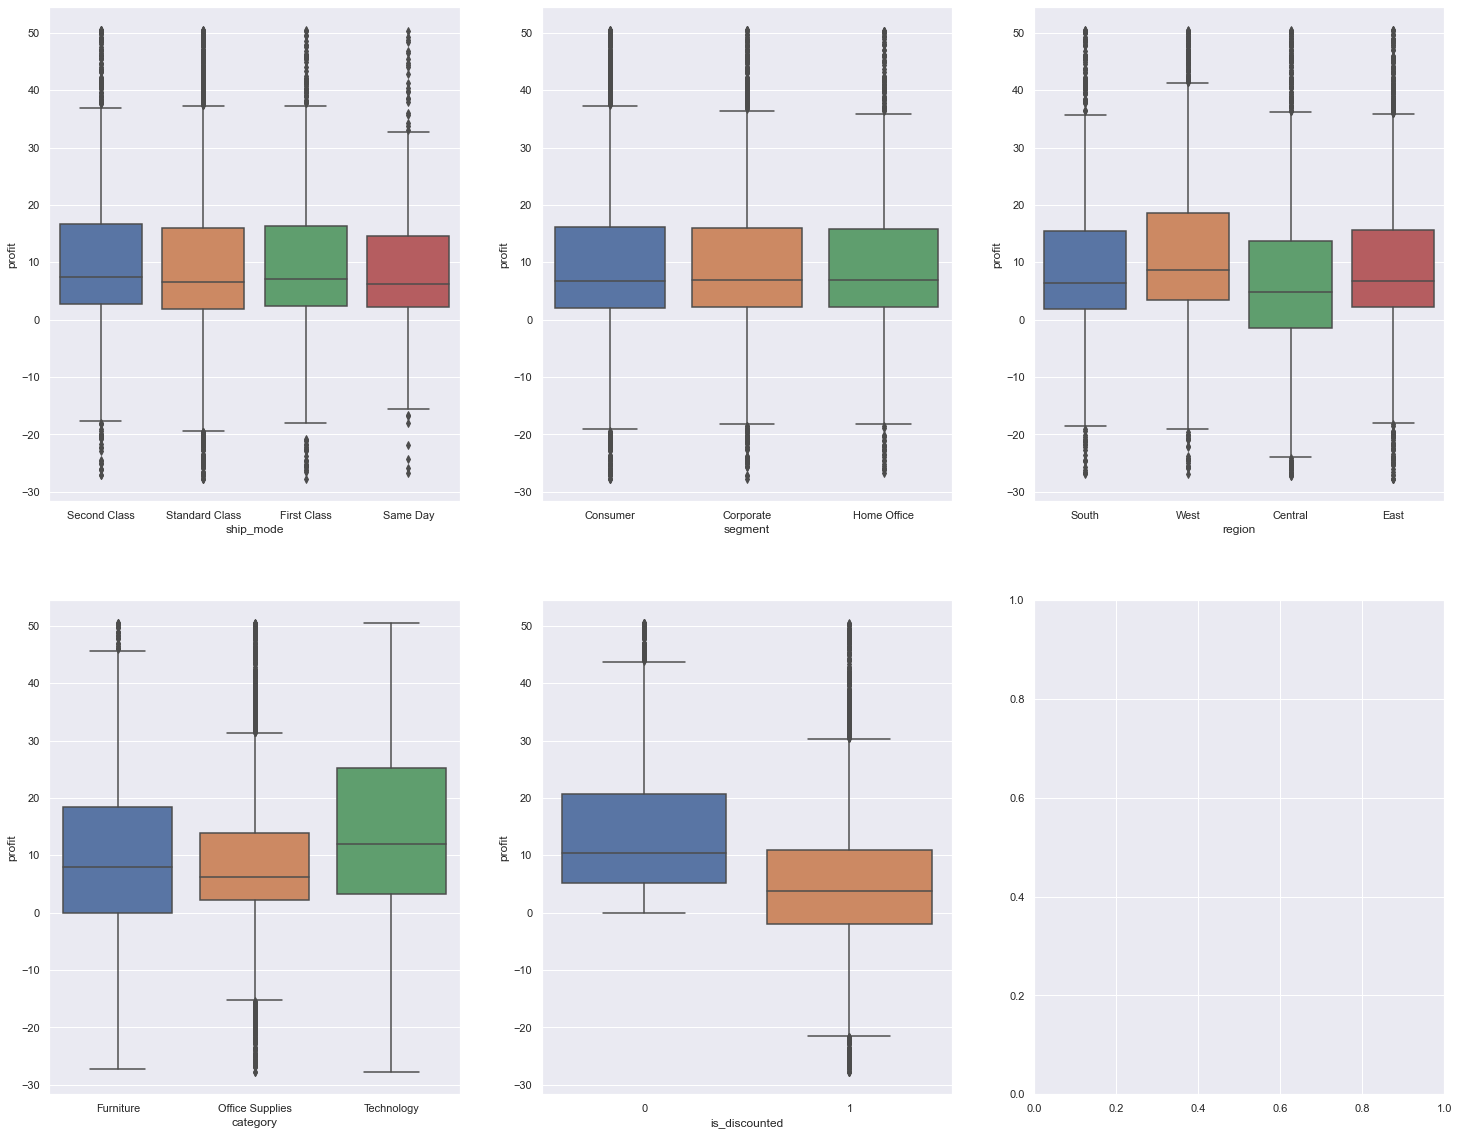

In [27]:
fig, ax = plt.subplots(2, 3, figsize = (25, 20))
sns.boxplot(x = "ship_mode", y = "profit", data = df, ax = ax[0, 0])
sns.boxplot(x = "segment", y = "profit", data = df, ax = ax[0, 1])
sns.boxplot(x = "region", y = "profit", data = df, ax = ax[0, 2])
sns.boxplot(x = "category", y = "profit", data = df, ax = ax[1, 0])
sns.boxplot(x = "is_discounted", y = "profit", data = df, ax = ax[1, 1])
plt.show()

In [28]:
print("En general, los productos que tienen descuento generan una utilidad baja, llegando a ser incluso negativa")
print("Los productos de la categoría de tecnología tienden a generar una utilidad más alta")

En general, los productos que tienen descuento generan una utilidad baja, llegando a ser incluso negativa
Los productos de la categoría de tecnología tienden a generar una utilidad más alta


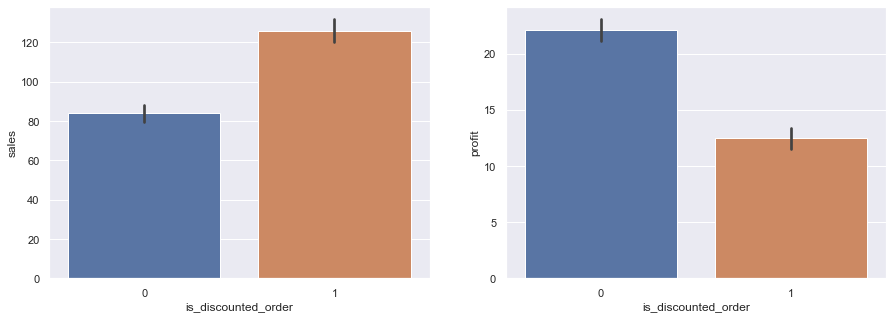

In [29]:
df_ordenes_con_descuento = df[["order_id", "is_discounted", "profit", "sales"]].groupby("order_id").agg(np.sum)

df_ordenes_con_descuento["is_discounted_order"] = df_ordenes_con_descuento["is_discounted"].apply(lambda x: 1 if x > 0 else 0)

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.barplot(data = df_ordenes_con_descuento, x = "is_discounted_order", y = "sales", estimator = np.mean, ax = ax[0])
sns.barplot(data = df_ordenes_con_descuento, x = "is_discounted_order", y = "profit", estimator = np.mean, ax = ax[1])
plt.show()

In [41]:
ticket_promedio_orden_con_descuento = np.mean(df_ordenes_con_descuento[df_ordenes_con_descuento["is_discounted_order"] == 1]["sales"])
ticket_promedio_orden_sin_descuento = np.mean(df_ordenes_con_descuento[df_ordenes_con_descuento["is_discounted_order"] == 0]["sales"])
diferencia_ticket_promedio =(ticket_promedio_orden_con_descuento - ticket_promedio_orden_sin_descuento) / ticket_promedio_orden_sin_descuento

ganancia_promedio_con_descuento = np.mean(df_ordenes_con_descuento[df_ordenes_con_descuento["is_discounted_order"] == 1]["profit"]) 
ganancia_promedio_sin_descuento = np.mean(df_ordenes_con_descuento[df_ordenes_con_descuento["is_discounted_order"] == 0]["profit"])
diferencia_ganancia_promedio = (ganancia_promedio_con_descuento - ganancia_promedio_sin_descuento) / ganancia_promedio_sin_descuento

print(f"El ticket promedio de las órdenes con por lo menos un producto con descuento es {diferencia_ticket_promedio * 100}% mayor que las ordenes sin ningún producto con descuento")
print(f"La utilidad promedio por orden es {diferencia_ganancia_promedio * 100}% menor en las órdenes que tienen por lo menos un producto con descuento")

El ticket promedio de las órdenes con por lo menos un producto con descuento es 50.02767134820244% mayor que las ordenes sin ningún producto con descuento
La utilidad promedio por orden es -43.44048460256265% menor en las órdenes que tienen por lo menos un producto con descuento


In [31]:
df_analisis_tiempo = df.copy()
df_analisis_tiempo["month_start"] = df_analisis_tiempo["order_date"].apply(lambda x: datetime.date(x.year, x.month, 1))

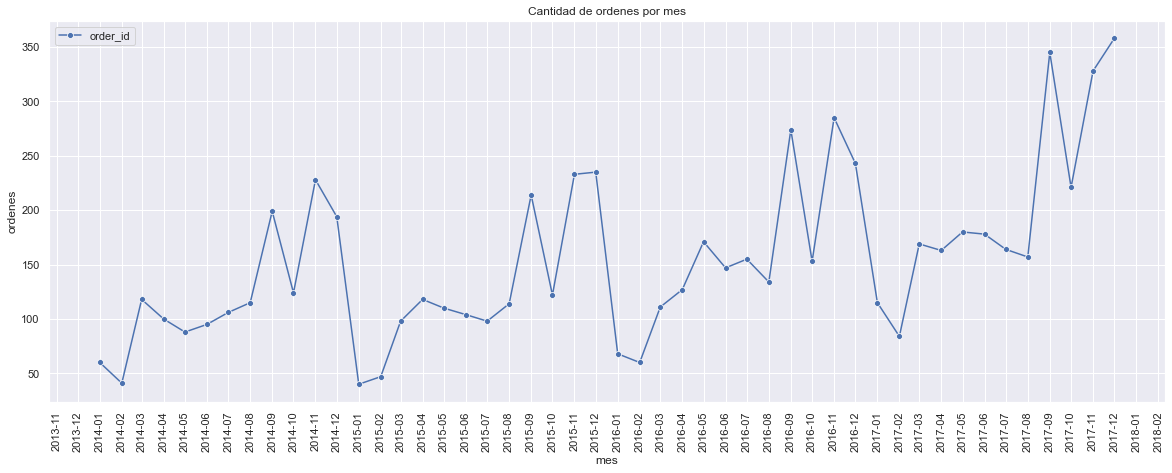

La demanda de los productos de la SuperStore es estacional en el último trimestre del año.


In [63]:
df_ordenes_year_month = df_analisis_tiempo[["month_start", "order_id"]].groupby("month_start").count()

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y-%m')

fig, ax = plt.subplots(figsize = (20, 7))
sns.lineplot(data = df_ordenes_year_month["order_id"], label = "order_id", marker = "o")

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.title("Cantidad de órdenes por mes")
plt.xlabel("Mes")
plt.ylabel("Órdenes")

plt.xticks(rotation = 90)
plt.show()

print("La demanda de los productos de la SuperStore es estacional en el último trimestre del año.")

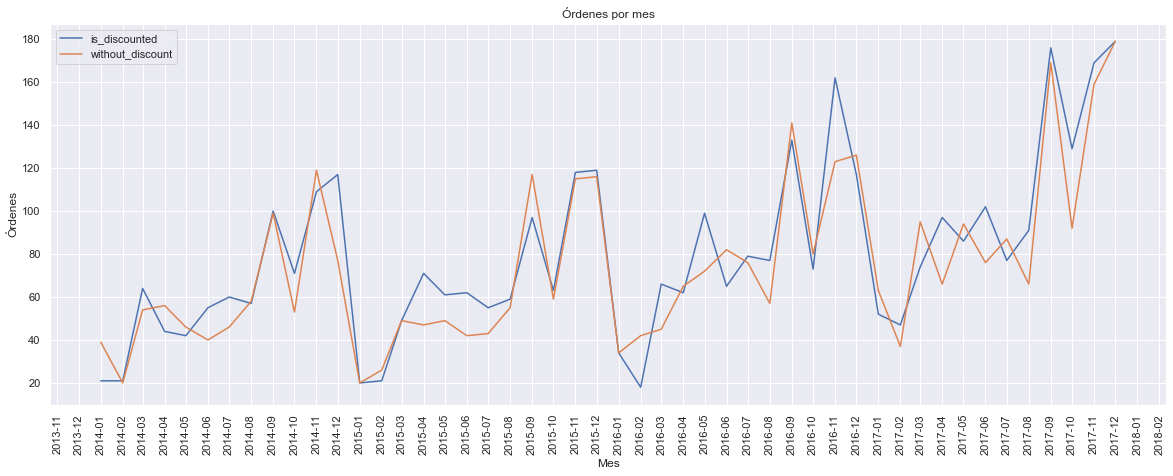

In [100]:
df_ordenes_year_month_descuento = df_analisis_tiempo[["month_start", "order_id", "is_discounted"]].groupby(["month_start", "is_discounted"]).count().reset_index().set_index("month_start")

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y-%m')

fig, ax = plt.subplots(figsize = (20, 7))
plt.plot(df_ordenes_year_month_descuento[df_ordenes_year_month_descuento["is_discounted"] == 1]["order_id"])
plt.plot(df_ordenes_year_month_descuento[df_ordenes_year_month_descuento["is_discounted"] == 0]["order_id"])

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.legend(["is_discounted", "without_discount"])
plt.title("Órdenes por mes")
plt.xlabel("Mes")
plt.ylabel("Órdenes")

plt.xticks(rotation = 90)
plt.show()

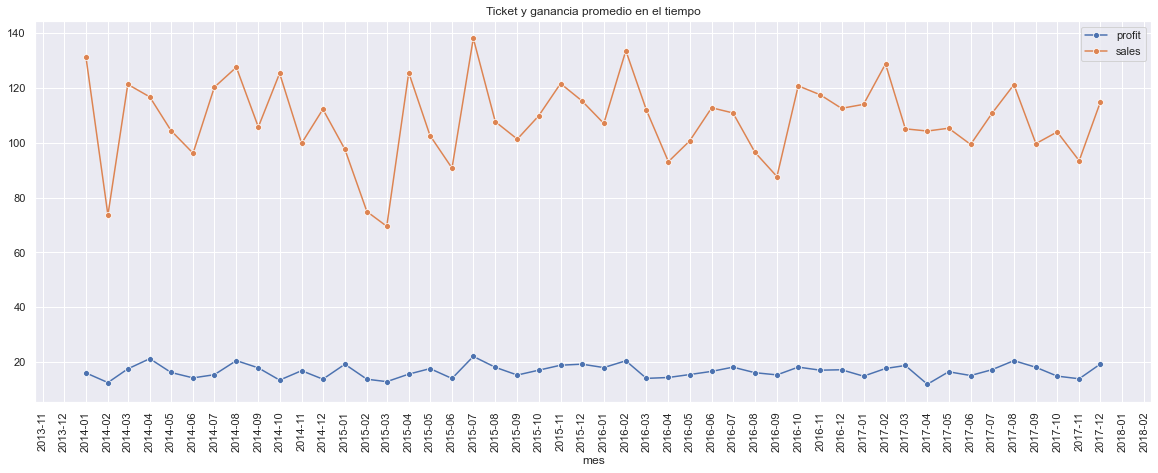

El ticket y utilidad promedio no presentan estacionalidad
El ticket promedio mensual por orden está en un rango de [69.49939705882353, 138.04892592592594]
La utilidad promedio mensual por orden está en un rango de [11.898581443298971, 22.056766666666665]


In [42]:
fig, axes = plt.subplots(figsize = (20, 7))

df_year_month_avg_profit_sales = df_analisis_tiempo[["order_id", "month_start", "profit", "sales"]].groupby(["month_start", "order_id"]).sum().reset_index()[["month_start", "profit", "sales"]].groupby("month_start").mean()

sns.lineplot(data = df_year_month_avg_profit_sales["profit"], label = "profit", marker = "o")
sns.lineplot(data = df_year_month_avg_profit_sales["sales"], label = "sales", marker = "o")

axes.xaxis.set_major_locator(months)
axes.xaxis.set_major_formatter(years_fmt)
axes.xaxis.set_minor_locator(months)
plt.title("Ticket y ganancia promedio en el tiempo")
plt.xlabel("mes")
plt.ylabel("")
plt.xticks(rotation = 90)
plt.show()

print("El ticket y utilidad promedio no presentan estacionalidad")
print("El ticket promedio mensual por orden está en un rango de", [df_year_month_avg_profit_sales["sales"].min(), df_year_month_avg_profit_sales["sales"].max()])
print("La utilidad promedio mensual por orden está en un rango de", [df_year_month_avg_profit_sales["profit"].min(), df_year_month_avg_profit_sales["profit"].max()])

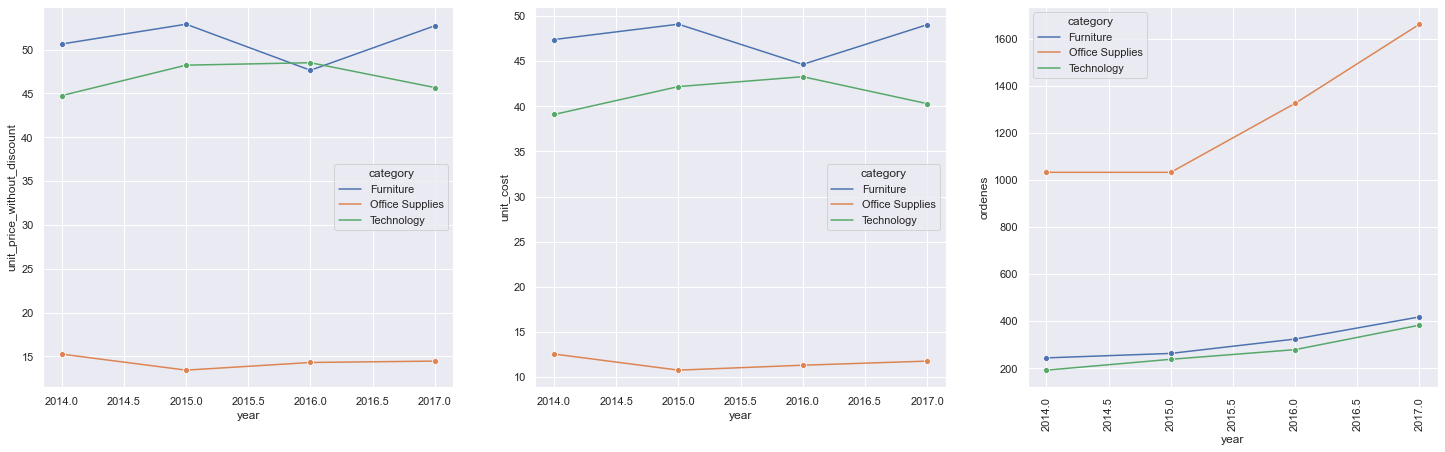

La cantidad de órdenes de cada categoría ha aumentado ligeramente durante el tiempo. La categoría de materiales de oficina ha tenido un crecimiento significativo en la cantidad de órdenes.
El costo por unidad promedio de cada producto se ha mantenido a través de los años


In [44]:
df_cateogria_precio_costo = df_analisis_tiempo.copy()
df_cateogria_precio_costo["unit_price_without_discount"] = (df_cateogria_precio_costo["sales"] * (df_cateogria_precio_costo["discount"] + 1)) / df_cateogria_precio_costo["quantity"]
df_cateogria_precio_costo["unit_cost"] = ((df_cateogria_precio_costo["sales"] * (df_cateogria_precio_costo["discount"] + 1)) - df_cateogria_precio_costo["profit"]) / df_cateogria_precio_costo["quantity"]
df_cateogria_precio_costo["year"] = df_cateogria_precio_costo["order_date"].dt.year

df_cateogria_precio_costo_promedio = df_cateogria_precio_costo.copy()
df_cateogria_precio_costo_promedio = df_cateogria_precio_costo_promedio[["year", "category", "unit_price_without_discount", "unit_cost"]].groupby(["year", "category"]).mean()
df_cantidad_ordenes = df_cateogria_precio_costo[["year", "order_id", "category"]].groupby(["year", "category"]).count().reset_index()

fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.lineplot(data = df_cateogria_precio_costo_promedio, x = "year", y = "unit_price_without_discount", hue = "category", ax = axes[0], marker = "o")
sns.lineplot(data = df_cateogria_precio_costo_promedio, x = "year", y = "unit_cost", hue = "category", ax = axes[1], marker = "o")
a = sns.lineplot(data = df_cantidad_ordenes, x = "year", y = "order_id", hue = "category", ax = axes[2], marker = "o")
a.set_ylabel("ordenes")

plt.xticks(rotation = 90)
plt.show()

print("La cantidad de órdenes de cada categoría ha aumentado ligeramente durante el tiempo. La categoría de materiales de oficina ha tenido un crecimiento significativo en la cantidad de órdenes.")
print("El costo por unidad promedio de cada producto se ha mantenido a través de los años")

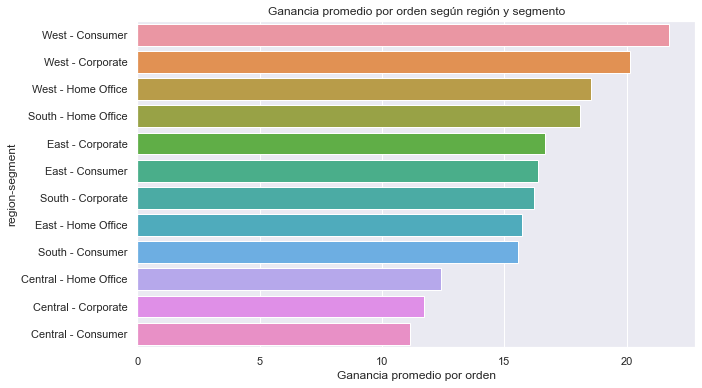

En promedio, la región oeste representa una mayor utilidad por orden
En promedio, la región central tiene la utilidad más baja por orden


In [46]:
df_region_segmento = df.copy()

df_region_segmento_avg_profit = df_region_segmento[["profit", "region", "segment", "order_id"]].groupby(["region", "segment", "order_id"]).sum().reset_index().groupby(["region", "segment"]).mean().reset_index()

df_region_segmento_avg_profit["region-segment"] = [df_region_segmento_avg_profit["region"][x] + " - " + df_region_segmento_avg_profit["segment"][x] for x in range(len(df_region_segmento_avg_profit))]

plt.figure(figsize = (10, 6))
plt.title("Ganancia promedio por orden según región y segmento")
sns.barplot(data = df_region_segmento_avg_profit, y = "region-segment", x = "profit", order = df_region_segmento_avg_profit.sort_values(by = "profit", ascending = False)["region-segment"])
plt.xlabel("Ganancia promedio por orden")
plt.show()

print("En promedio, la región oeste representa una mayor utilidad por orden")
print("En promedio, la región central tiene la utilidad más baja por orden")

¿Existe asociación entre el tipo de producto y la región? Podemos usar un test de chi2, ya que la base de datos es una muestra de una población.

In [36]:
region_category_tabla = pd.crosstab(df["category"], df["region"])

chi2, pval, dof, expected = chi2_contingency(region_category_tabla)

print(pval, "Se rechaza la hipótesis nula y se concluye que existe una asociación estadísticamente significativa entre la categoría del producto y la región del cliente")

0.006259423843446558 Se rechaza la hipótesis nula y se concluye que existe una asociación estadísticamente significativa entre la categoría del producto y la región del cliente


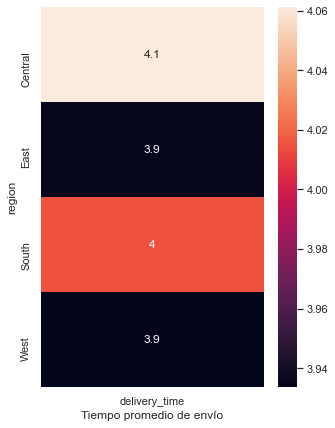

Los tiempos promedio de envío son similares en todas las regiones


In [37]:
df["delivery_time"] = (df["ship_date"] - df["order_date"]).dt.days

plt.figure(figsize = (5, 7))
sns.heatmap(df[["region", "delivery_time"]].groupby("region").mean(), annot = True)
plt.xlabel("Tiempo promedio de envío")
plt.show()
print("Los tiempos promedio de envío son similares en todas las regiones")

Porcentaje de órdenes enviadas a cada región según ventana de tiempo


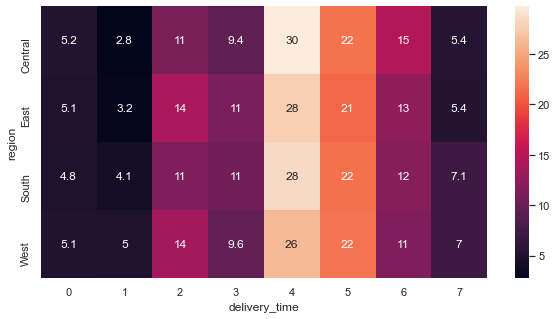

In [47]:
print("Porcentaje de órdenes enviadas a cada región según ventana de tiempo")

plt.figure(figsize = (10, 5))
sns.heatmap(pd.crosstab(df["region"], df["delivery_time"], normalize = "index").apply(lambda x: x * 100), annot = True)
plt.show()

Validación correlación lineal.

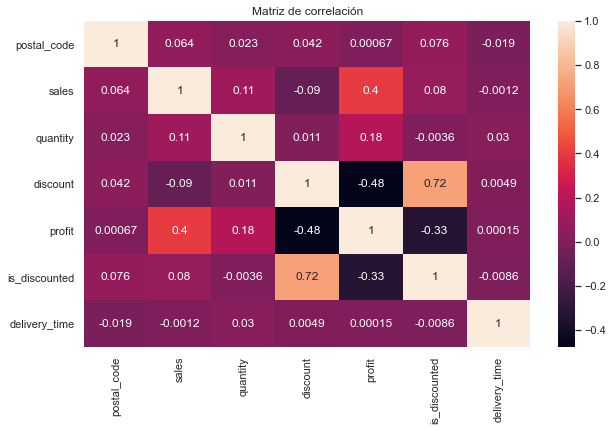

In [39]:
plt.figure(figsize = (10, 6))
plt.title("Matriz de correlación")
sns.heatmap(df.corr(), annot = True)
plt.show()

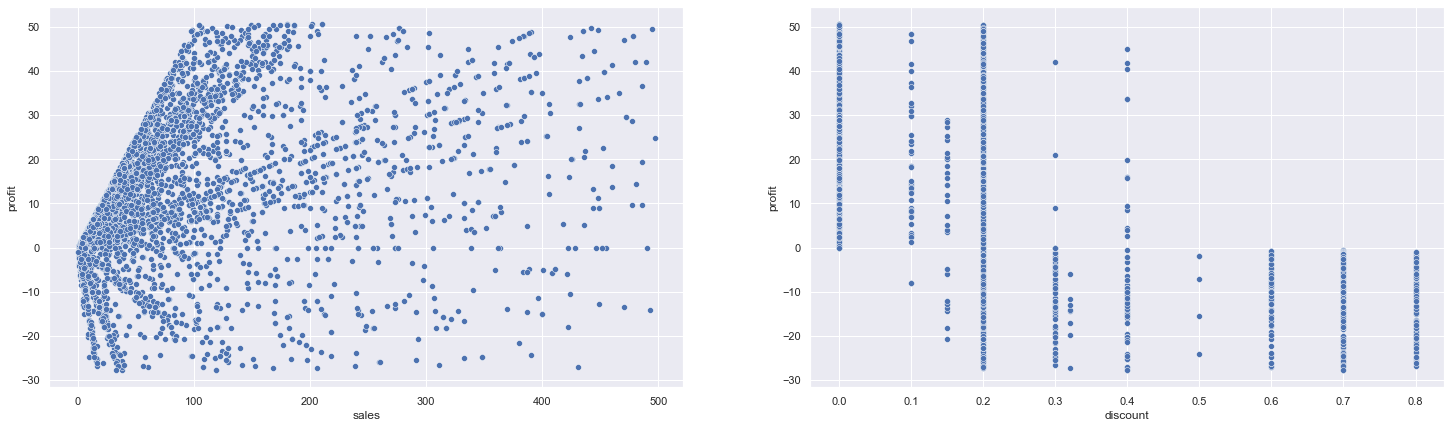

Existe una correlación positiva baja entre las variables sales y profit. El hecho de que la correlación sea baja indica que un ticket promedio más alto no siempre significa una mayor utilidad
Existe una correlación negativa baja entre las variables discount y profit, que indica que en algunos casos un mayor descuento no significa una menor utilidad


In [48]:
fig, ax = plt.subplots(1, 2, figsize = (25, 7))

sns.scatterplot(data = df, x = "sales", y = "profit", ax = ax[0])
sns.scatterplot(data = df, x = "discount", y = "profit", ax = ax[1])

plt.show()

print("Existe una correlación positiva baja entre las variables sales y profit. El hecho de que la correlación sea baja indica que un ticket promedio más alto no siempre significa una mayor utilidad")
print("Existe una correlación negativa baja entre las variables discount y profit, que indica que en algunos casos un mayor descuento no significa una menor utilidad")